In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset object
data = load_breast_cancer()

# Create a DataFrame from the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target labels to the DataFrame
df['target'] = data.target

# Inspect the first few rows
print("First few rows of the dataset:")
display(df.head())

# Verify structure and check for missing values
print("\nDataset Information:")
df.info()

First few rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Data preprocessing completed.
Training set shape: (455, 30)
Testing set shape: (114, 30)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

# List to store metrics
results_list = []

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict labels and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC Score': roc_auc_score(y_test, y_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    results_list.append(metrics)

# Create a DataFrame to display results
results_df = pd.DataFrame(results_list)
print("Model Evaluation Metrics:")
display(results_df)

Model Evaluation Metrics:


,Model,Accuracy,AUC Score,Precision,Recall,F1 Score,MCC
0,Logistic Regression,0.973684,0.997380,0.972222,0.985915,0.979021,0.943898
1,Decision Tree,0.947368,0.943990,0.957746,0.957746,0.957746,0.887979
2,K-Nearest Neighbor,0.947368,0.981985,0.957746,0.957746,0.957746,0.887979
3,Gaussian Naive Bayes,0.964912,0.997380,0.958904,0.985915,0.972222,0.925285
4,Random Forest,0.964912,0.995251,0.958904,0.985915,0.972222,0.925285
5,XGBoost,0.956140,0.990829,0.958333,0.971831,0.965035,0.906379


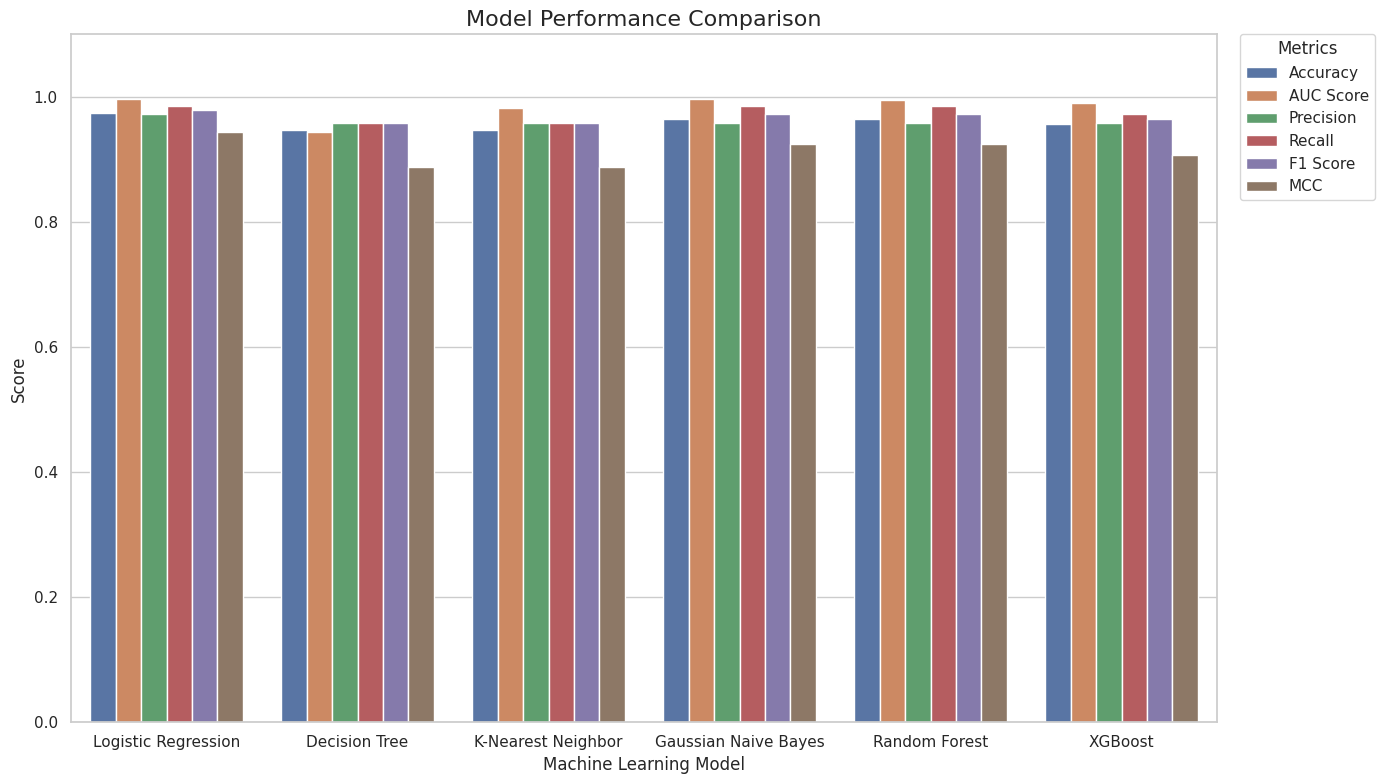

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transform the results_df DataFrame from a wide format to a long format
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create a grouped bar chart using seaborn.barplot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=results_melted, x='Model', y='Value', hue='Metric')

# Set the plot title and axis labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Ensure the y-axis scale is appropriate (0 to 1)
plt.ylim(0, 1.1)

# Position the legend so it does not overlap with the bars
plt.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
import joblib
import os

# 1. Create a directory named 'model' if it does not already exist
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

# 2. Save the fitted StandardScaler object
scaler_filename = os.path.join(model_dir, 'scaler.joblib')
joblib.dump(scaler, scaler_filename)
print(f"Saved scaler to {scaler_filename}")

# 3. Iterate through the models dictionary and save each classifier
for name, model in models.items():
    # Generate a filename: lowercase and replace spaces with underscores
    filename = name.lower().replace(' ', '_') + '.joblib'
    file_path = os.path.join(model_dir, filename)
    joblib.dump(model, file_path)
    print(f"Saved model '{name}' to {file_path}")

# 4. Verify that all files have been correctly saved
print("\nContents of the 'model' directory:")
print(os.listdir(model_dir))

Saved scaler to model/scaler.joblib
Saved model 'Logistic Regression' to model/logistic_regression.joblib
Saved model 'Decision Tree' to model/decision_tree.joblib
Saved model 'K-Nearest Neighbor' to model/k-nearest_neighbor.joblib
Saved model 'Gaussian Naive Bayes' to model/gaussian_naive_bayes.joblib
Saved model 'Random Forest' to model/random_forest.joblib
Saved model 'XGBoost' to model/xgboost.joblib

Contents of the 'model' directory:
['scaler.joblib', 'logistic_regression.joblib', 'decision_tree.joblib', 'k-nearest_neighbor.joblib', 'gaussian_naive_bayes.joblib', 'random_forest.joblib', 'xgboost.joblib']


In [17]:
import joblib

# Save the model evaluation results for display in the app
results_df.to_csv('model/results.csv', index=False)

# Extract and save feature names and their mean values to provide defaults for the UI inputs
feature_metadata = {
    'feature_names': X.columns.tolist(),
    'feature_means': X.mean().to_dict()
}
joblib.dump(feature_metadata, 'model/feature_metadata.joblib')

print("Saved results.csv and feature_metadata.joblib to the 'model' directory.")

Saved results.csv and feature_metadata.joblib to the 'model' directory.


In [26]:
import os
import pandas as pd

# 1. Combine X_test and y_test into a single DataFrame
test_df = X_test.copy()
test_df['target'] = y_test

# 2. Export the combined DataFrame to CSV in the 'model/' directory
test_data_path = 'model/test_data.csv'
test_df.to_csv(test_data_path, index=False)

print(f"Saved test dataset to {test_data_path}")

# 3. Confirm the file creation
print("\nUpdated contents of the 'model' directory:")
print(os.listdir('model'))

Saved test dataset to model/test_data.csv

Updated contents of the 'model' directory:
['scaler.joblib', 'logistic_regression.joblib', 'decision_tree.joblib', 'k-nearest_neighbor.joblib', 'gaussian_naive_bayes.joblib', 'random_forest.joblib', 'xgboost.joblib', 'results.csv', 'feature_metadata.joblib', 'test_data.csv']
